# Customer Churn Prediction

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
data = pd.read_csv("churn_prediction.csv")
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


## Take a Quick Look at the Data

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   days_since_last_transaction     25159 non-null  float64
 10  current_balance                 28382 non-null  float64
 11  previous_month_end_balance      28382 non-null  float64
 12  average_monthly_balance_prevQ   

We have only two categorical features, that is, gender and occupation. Also, there are quite a few missing values. These features are gender, dependents, occupation, city, and days_since_last_transaction.

In [165]:
data.corr()["churn"].sort_values(ascending=False)

churn                             1.000000
previous_month_debit              0.073058
current_month_debit               0.048041
previous_month_credit             0.042179
branch_code                       0.035469
dependents                        0.033487
current_month_credit              0.020755
average_monthly_balance_prevQ2    0.018376
previous_month_balance            0.014593
average_monthly_balance_prevQ     0.011960
previous_month_end_balance        0.006886
customer_nw_category              0.006551
city                             -0.001585
customer_id                      -0.002723
current_month_balance            -0.006391
age                              -0.020012
current_balance                  -0.024181
days_since_last_transaction      -0.055830
vintage                          -0.064637
Name: churn, dtype: float64

These numerical features doesn't have strong correlation with churn

## Imputing Missing Values

In [166]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

### Gender & Occupation Features

<AxesSubplot:xlabel='occupation', ylabel='count'>

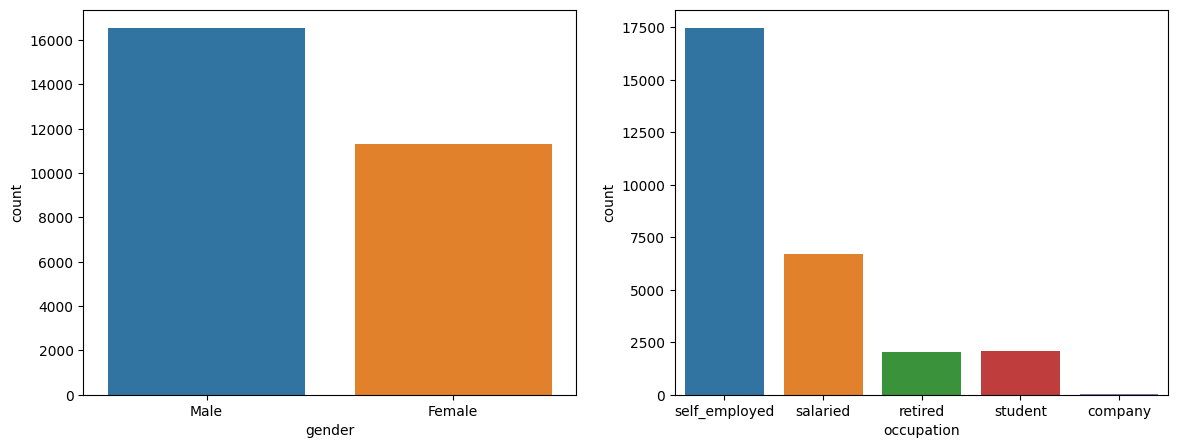

In [167]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x=data['gender'], ax=ax[0])
sns.countplot(x=data['occupation'], ax=ax[1])

We can replace Female and Male with 1 or 0. For missing values we can use -1. For occupation we can fill missing values as Unknown.

<AxesSubplot:xlabel='occupation', ylabel='count'>

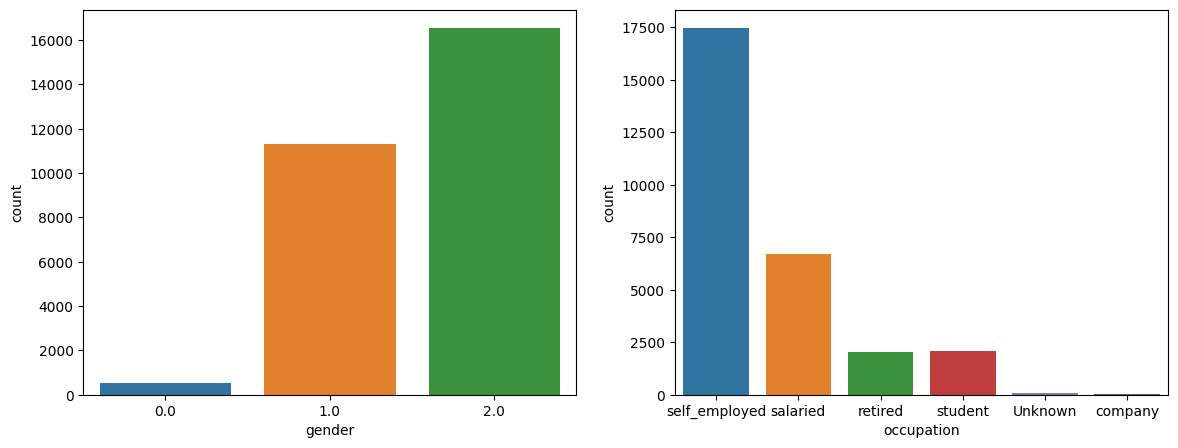

In [168]:
gender_dictionary = {"Male": 2, "Female": 1, np.NaN: 0}
data.replace({'gender': gender_dictionary}, inplace = True)

data["occupation"].fillna("Unknown", inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x=data['gender'], ax=ax[0])
sns.countplot(x=data['occupation'], ax=ax[1])

<AxesSubplot:xlabel='churn', ylabel='count'>

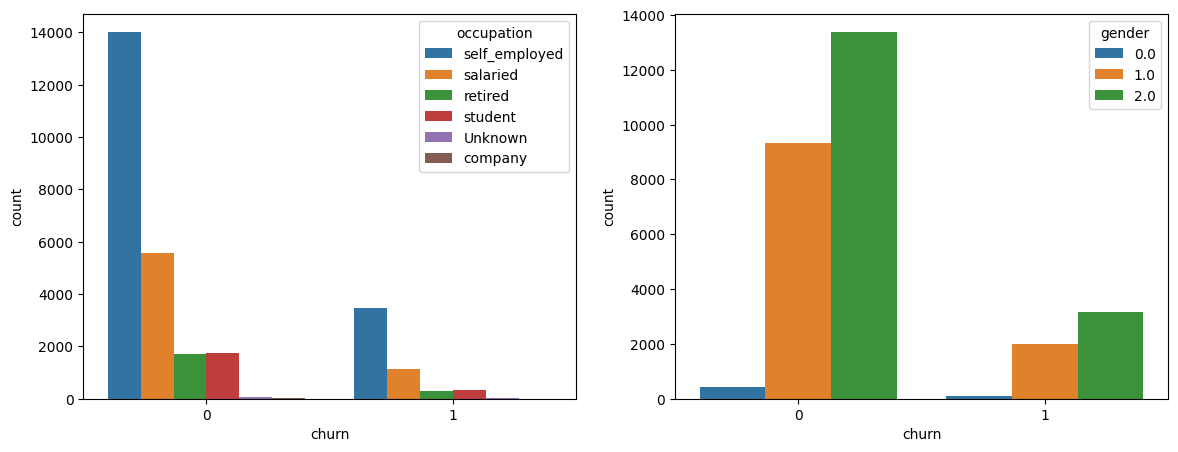

In [169]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=data, x="churn", hue="occupation", ax=ax[0])
sns.countplot(data=data, x="churn", hue="gender", ax=ax[1])

In [170]:
data['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
9.0         1
52.0        1
36.0        1
50.0        1
8.0         1
25.0        1
32.0        1
Name: dependents, dtype: int64

We can change dependents as yes(1) or no(0)

In [171]:
data['dependents'] = data['dependents'].apply(lambda x: int(x > 0))
data['dependents'].value_counts()

0    23898
1     4484
Name: dependents, dtype: int64

Also we can group the age and vintage features

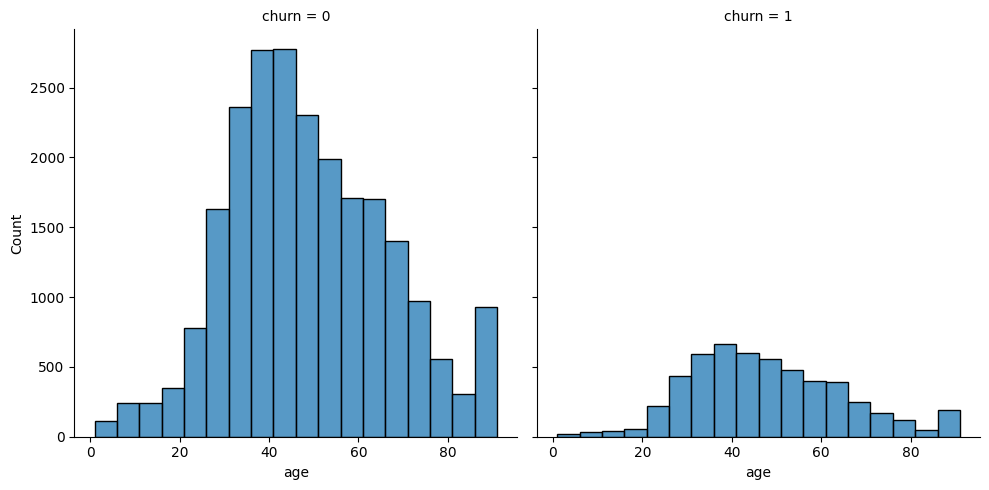

In [172]:
sns.displot(data, x="age", col="churn", binwidth=5)

In [173]:
data['age_group'] = data['age'].apply(lambda x: x // 20)
data[['age_group', 'age']].head()

,age_group,age
0,3,66
1,1,35
2,1,31
3,4,90
4,2,42


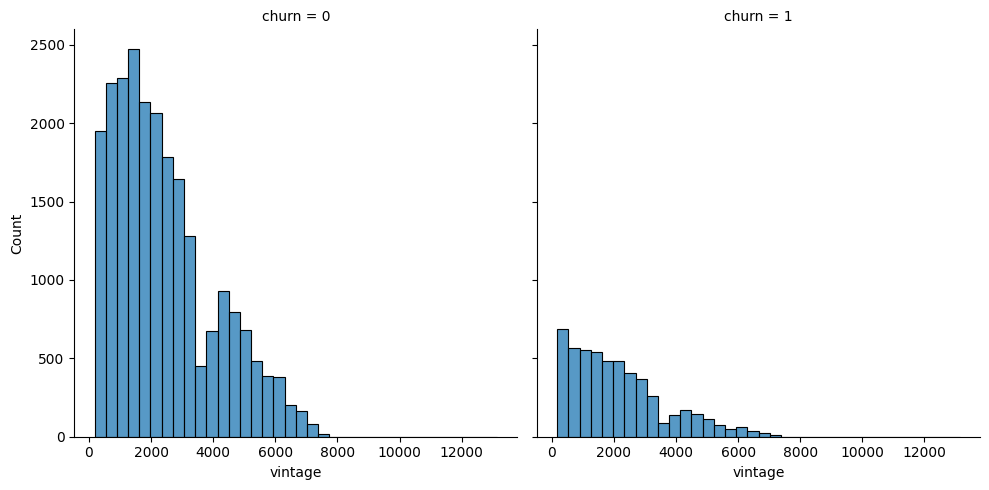

In [174]:
sns.displot(data, x="vintage", col="churn", binwidth=360)

In [175]:
data['vintage_group'] = data['vintage'].apply(lambda x: x // 360)
data[['vintage_group', 'vintage']].head()

,vintage_group,vintage
0,8,3135
1,0,310
2,6,2356
3,1,478
4,7,2531


In [176]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
imputed_data = imputer.fit_transform(data)
data = pd.DataFrame(data=imputed_data, columns=data.columns).astype(data.dtypes.to_dict())
data.head()


,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,age_group,vintage_group
0,1,3135,66,2.0,0,self_employed,187.0,2,755,224.0,...,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,3,8
1,2,310,35,2.0,0,self_employed,1020.0,2,3214,60.0,...,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,1,0
2,4,2356,31,2.0,0,salaried,146.0,2,41,0.0,...,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,1,6
3,5,478,90,0.0,0,self_employed,1020.0,2,582,147.0,...,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,4,1
4,6,2531,42,2.0,1,self_employed,1494.0,3,388,58.0,...,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2,7


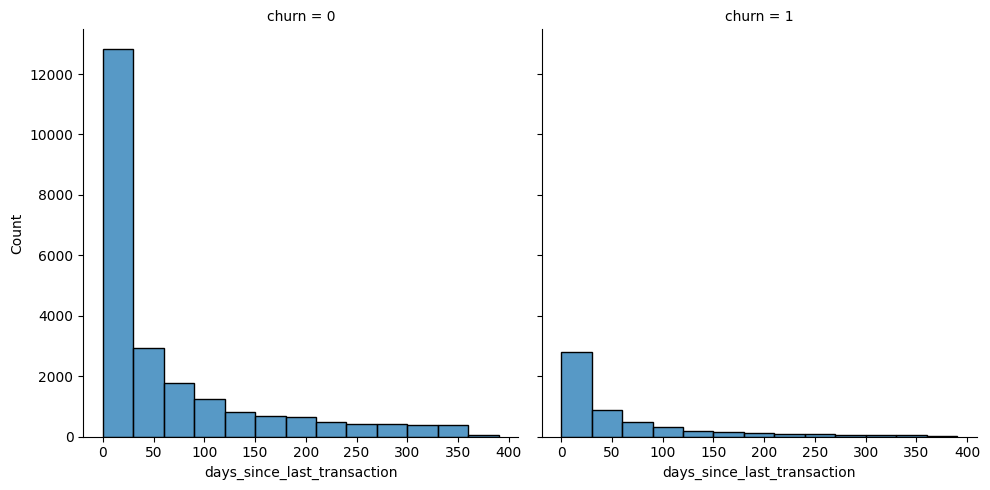

In [177]:
sns.displot(data, x="days_since_last_transaction", col="churn", binwidth=30)

We can also convert days_since_last_transaction feature to the week and month

In [178]:
data['weeks_since_last_transaction'] = data['days_since_last_transaction'].apply(lambda x: x // 7)
data['months_since_last_transaction'] = data['days_since_last_transaction'].apply(lambda x: x // 30)

## Encoding Categorical Features

In [179]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
occupation_encoded = pd.DataFrame(data=encoder.fit_transform(data[["occupation"]]), 
                                  columns=encoder.get_feature_names_out())
occupation_encoded

,occupation_Unknown,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
28377,0.0,0.0,0.0,0.0,0.0,1.0
28378,0.0,0.0,0.0,0.0,1.0,0.0
28379,0.0,0.0,0.0,1.0,0.0,0.0
28380,0.0,0.0,0.0,0.0,1.0,0.0


In [180]:
data.drop("occupation", axis=1, inplace=True)
data = pd.concat([data, occupation_encoded], axis=1)
data.head(7)

,customer_id,vintage,age,gender,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,age_group,vintage_group,weeks_since_last_transaction,months_since_last_transaction,occupation_Unknown,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,2.0,0,187.0,2,755,224.0,1458.71,...,3,8,32.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,310,35,2.0,0,1020.0,2,3214,60.0,5390.37,...,1,0,8.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4,2356,31,2.0,0,146.0,2,41,0.0,3913.16,...,1,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5,478,90,0.0,0,1020.0,2,582,147.0,2291.91,...,4,1,21.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0
4,6,2531,42,2.0,1,1494.0,3,388,58.0,927.72,...,2,7,8.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,7,263,42,1.0,0,1096.0,2,1666,60.0,15202.20,...,2,0,8.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
6,8,5922,72,2.0,0,1020.0,1,1,98.0,7006.93,...,3,16,14.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0


In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          28382 non-null  float64
 4   dependents                      28382 non-null  int64  
 5   city                            28382 non-null  float64
 6   customer_nw_category            28382 non-null  int64  
 7   branch_code                     28382 non-null  int64  
 8   days_since_last_transaction     28382 non-null  float64
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [182]:
data.nunique()

customer_id                       28382
vintage                            5473
age                                  90
gender                                3
dependents                            2
city                               1604
customer_nw_category                  3
branch_code                        3185
days_since_last_transaction         360
current_balance                   27903
previous_month_end_balance        27922
average_monthly_balance_prevQ     27801
average_monthly_balance_prevQ2    27940
current_month_credit              10411
previous_month_credit             10711
current_month_debit               13704
previous_month_debit              14010
current_month_balance             27944
previous_month_balance            27913
churn                                 2
age_group                             5
vintage_group                        29
weeks_since_last_transaction         53
months_since_last_transaction        13
occupation_Unknown                    2


We can drop the unimportant features such as customer_id, vintage, city, branch code etc.

In [183]:
data.drop(["customer_id", "city", "branch_code", "vintage", "age", "days_since_last_transaction"], 
          axis=1, inplace=True)

In [184]:
data.describe()

,gender,dependents,customer_nw_category,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,...,age_group,vintage_group,weeks_since_last_transaction,months_since_last_transaction,occupation_Unknown,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
count,28382.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,...,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000
mean,1.564548,0.157987,2.225530,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,...,1.940032,6.066521,8.473399,1.689839,0.002819,0.001409,0.071313,0.236206,0.615742,0.072511
std,0.531826,0.364736,0.660443,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,...,0.934973,4.489288,11.983698,2.740318,0.053017,0.037515,0.257351,0.424758,0.486428,0.259336
min,0.000000,0.000000,1.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,...,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,2.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,...,2.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,0.000000,3.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,...,3.000000,8.000000,11.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2.000000,1.000000,3.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,...,4.000000,35.000000,52.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation without scaling

In [185]:
data.corr()["churn"].sort_values(ascending=False)

churn                             1.000000
previous_month_debit              0.073058
current_month_debit               0.048041
occupation_self_employed          0.042539
previous_month_credit             0.042179
dependents                        0.041515
current_month_credit              0.020755
average_monthly_balance_prevQ2    0.018376
gender                            0.015938
previous_month_balance            0.014593
average_monthly_balance_prevQ     0.011960
previous_month_end_balance        0.006886
customer_nw_category              0.006551
occupation_Unknown               -0.003124
current_month_balance            -0.006391
occupation_company               -0.008250
age_group                        -0.018870
occupation_student               -0.020072
occupation_salaried              -0.020376
current_balance                  -0.024181
occupation_retired               -0.024702
weeks_since_last_transaction     -0.030563
months_since_last_transaction    -0.034300
vintage_gro

## Seperating Target

In [186]:
y = data["churn"].astype("int")
X = data.drop("churn", axis=1)

In [187]:
X.head(7)

,gender,dependents,customer_nw_category,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,...,age_group,vintage_group,weeks_since_last_transaction,months_since_last_transaction,occupation_Unknown,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,2.0,0,2,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,...,3,8,32.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,0,2,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,...,1,0,8.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,0,2,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,...,1,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0,2,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,...,4,1,21.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,1,3,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,...,2,7,8.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0,2,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,...,2,0,8.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
6,2.0,0,1,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,...,3,16,14.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0


## Scaling Numerical Features

In [188]:
from sklearn.preprocessing import StandardScaler

num_cols = ['customer_nw_category', 'current_balance', 'previous_month_end_balance', 
            'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance']

# balancing numerical columns
# Since min value for numerical columns was -1.650610e+04, we must add 16507 to make log tranformation
for i in num_cols:
    X[i] = np.log(X[i] + 16507)

std = StandardScaler()
scaled = std.fit_transform(X[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

X = X.drop(columns=num_cols, axis=1)
X = X.merge(scaled, left_index=True, right_index=True, how="left")

### Correlation with scaling

In [189]:
pd.concat([X, y], axis=1).corr()["churn"].sort_values(ascending=False)

churn                             1.000000
current_month_debit               0.195566
previous_month_debit              0.182414
previous_month_credit             0.107190
current_month_credit              0.059912
occupation_self_employed          0.042539
dependents                        0.041515
previous_month_balance            0.041482
average_monthly_balance_prevQ     0.034728
gender                            0.015938
average_monthly_balance_prevQ2    0.014504
customer_nw_category              0.006550
occupation_Unknown               -0.003124
previous_month_end_balance       -0.006094
occupation_company               -0.008250
age_group                        -0.018870
occupation_student               -0.020072
occupation_salaried              -0.020376
occupation_retired               -0.024702
weeks_since_last_transaction     -0.030563
months_since_last_transaction    -0.034300
current_month_balance            -0.059204
vintage_group                    -0.064210
current_bal

# Model Building

Firstly, I will use LogisticRegression for making predictions. After training the model, Precision, Recall and AUC-ROC evaluation metrics will be used. 

### Split dataset into training and testing sets

In [190]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [191]:
from sklearn.linear_model import LogisticRegression

# Fit logistic regression model
model = LogisticRegression(max_iter=700)
model.fit(X_train, y_train)

# Predict probabilities for testing set
probs = model.predict_proba(X_test)[:, 1]

### AUC ROC Curve & Confusion Matrix 

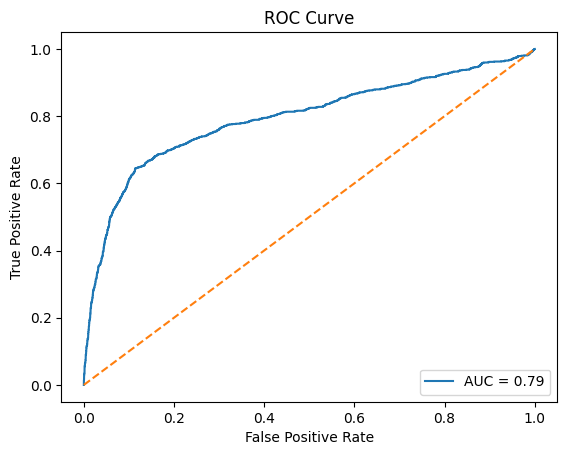

In [192]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# Calculate AUC-ROC score and plot ROC curve
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

Text(0.5, 1.0, 'Confusion Matrix')

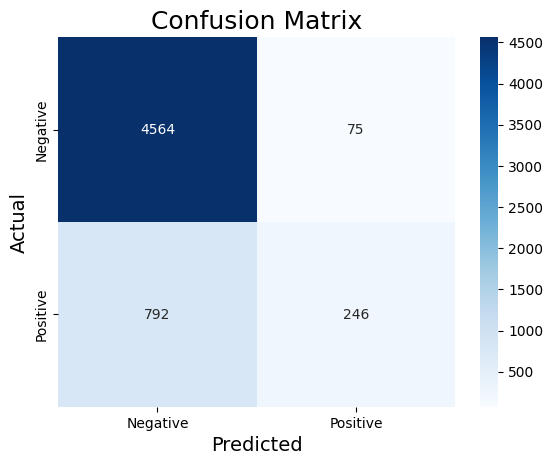

In [193]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=18)

### Precision, Recall, and F1 scores

In [194]:
from sklearn.metrics import recall_score, precision_score, f1_score


precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.7663551401869159, 0.23699421965317918, 0.36203090507726265)

### Cross Validation

In [195]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

def cv_score(ml_model, rstate = 12, thres = 0.5, cols = X.columns):
    i = 1
    cv_scores = []
    
    df = X.copy()
    df = df[cols]
    
    skfolds = StratifiedKFold(n_splits=5, random_state=rstate, shuffle=True)
    
    for train_index, test_index in skfolds.split(df, y):
        clone_clf = clone(ml_model) 
        X_train_folds, X_test_fold = df.loc[train_index], df.loc[test_index]
        y_train_folds, y_test_fold = y.loc[train_index], y.loc[test_index]

        clone_clf.fit(X_train_folds, y_train_folds) 
        y_probs = clone_clf.predict_proba(X_test_fold) [:, 1]
        
        # Use threshold to define the classes based on probability values
        pred_val = [1 if p > thres else 0 for p in y_probs]
        
        # Calculate scores for each fold and print
        roc_score = roc_auc_score(y_test_fold, y_probs)
        recall = recall_score(y_test_fold, pred_val)
        precision = precision_score(y_test_fold, pred_val)
        
        print('{} of kfold {}:'.format(i, skfolds.n_splits))
        msg = "ROC AUC Score: {:.8f}, Recall Score: {:.4f}, Precision Score: {:.4f} \n".format(roc_score, recall,precision)
        print(msg)
        
        cv_scores.append(roc_score)
        i+=1
    
    return cv_scores

In [196]:
all_feat_scores = cv_score(LogisticRegression(max_iter=700))

1 of kfold 5:
ROC AUC Score: 0.79953592, Recall Score: 0.2386, Precision Score: 0.7213 

2 of kfold 5:
ROC AUC Score: 0.80463961, Recall Score: 0.2300, Precision Score: 0.7492 

3 of kfold 5:
ROC AUC Score: 0.79786155, Recall Score: 0.2443, Precision Score: 0.7301 

4 of kfold 5:
ROC AUC Score: 0.79488690, Recall Score: 0.2357, Precision Score: 0.7425 

5 of kfold 5:
ROC AUC Score: 0.79459519, Recall Score: 0.1996, Precision Score: 0.6774 



If we look at the scores for each fold, we can see some variability in the scores, which is expected. However, the scores are relatively consistent across folds, the model performs consistently across different subsets of the data.

- The ROC AUC score is nearly 0.8. This means the model has some predictive power, but there is still room for improvement.
- The recall score is between 0.2 and 0.25. That is, the model is only capturing a small proportion of the positive cases. As we saw in the Confusion Matrix, there is high number of false negatives. So, the model is wrongly predicrs a lot of positive cases.
- The precision score is between 0.67 and 0.75. The model is correctly identifying a relatively high proportion of the positive cases among the predicted positives.

We can also use cross_val_score method

In [197]:
from sklearn.model_selection import cross_val_score


cross_val_score(model, X_train, y_train, cv=5, scoring="roc_auc")

array([0.78476977, 0.80820237, 0.80603397, 0.78997541, 0.80395694])

### Recursive Feature Elimination or Backward Selection

We can try using Reverse Feature Elimination to check whether we can do better.

In [198]:
from sklearn.feature_selection import RFE

# Create the RFE object and rank each feature
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)

ranking_df = pd.DataFrame()
ranking_df['feature'] = X.columns
ranking_df['rank'] = rfe.ranking_
ranked = ranking_df.sort_values(by=['rank'])
ranked

,feature,rank
13,current_balance,1
16,average_monthly_balance_prevQ,2
7,occupation_company,3
15,average_monthly_balance_prevQ2,4
22,previous_month_balance,5
21,current_month_balance,6
19,current_month_debit,7
1,dependents,8
10,occupation_self_employed,9
20,previous_month_debit,10


In [199]:
# from sklearn.metrics import get_scorer_names

# print(get_scorer_names())

columns = ranked['feature'][:10].values
cross_val_score(model, X[columns], y, cv=5, scoring="roc_auc")

array([0.80706895, 0.7934831 , 0.80226019, 0.80785158, 0.78089127])

In [200]:
rfe_top_10_scores = cv_score(LogisticRegression(max_iter=700), cols = ranked['feature'][:10].values)

1 of kfold 5:
ROC AUC Score: 0.79955626, Recall Score: 0.2291, Precision Score: 0.7259 

2 of kfold 5:
ROC AUC Score: 0.80705416, Recall Score: 0.2215, Precision Score: 0.7492 

3 of kfold 5:
ROC AUC Score: 0.79873338, Recall Score: 0.2281, Precision Score: 0.7207 

4 of kfold 5:
ROC AUC Score: 0.79348016, Recall Score: 0.2110, Precision Score: 0.7303 

5 of kfold 5:
ROC AUC Score: 0.79566746, Recall Score: 0.1930, Precision Score: 0.6678 



<AxesSubplot:>

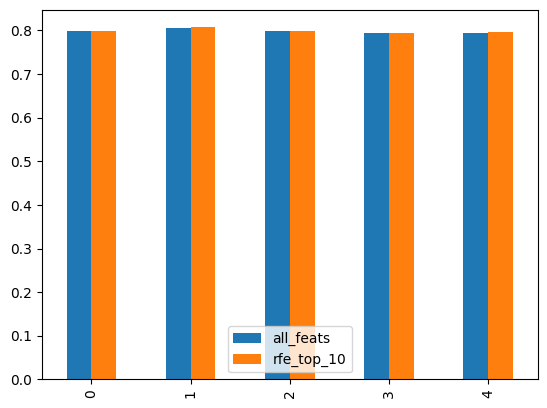

In [201]:
results_df = pd.DataFrame({'all_feats': all_feat_scores, 'rfe_top_10': rfe_top_10_scores})
results_df.plot(y=["all_feats", "rfe_top_10"], kind="bar")

Since recursive feature elimination (RFE) doesn't make big improvements in model performance, one of the reason we can conclude is the model is already using the most important features.

### Threshold

If we want higher Recall score, we can reduce threshold but of course there will be Precision-Recall trade-off.

In [213]:
cv_score(LogisticRegression(max_iter=700), cols = ranked['feature'][:10].values, thres=0.2)

1 of kfold 5:
ROC AUC Score: 0.79955626, Recall Score: 0.6835, Precision Score: 0.5067 

2 of kfold 5:
ROC AUC Score: 0.80705416, Recall Score: 0.6854, Precision Score: 0.5255 

3 of kfold 5:
ROC AUC Score: 0.79873338, Recall Score: 0.6759, Precision Score: 0.5178 

4 of kfold 5:
ROC AUC Score: 0.79348016, Recall Score: 0.6882, Precision Score: 0.5095 

5 of kfold 5:
ROC AUC Score: 0.79566746, Recall Score: 0.6635, Precision Score: 0.5190 



[0.7995562634878225,
 0.8070541568184154,
 0.798733381464865,
 0.7934801646558869,
 0.7956674631941795]